In [62]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

# Generate N random positive numbers, and N negative numbers.
# The mean is 2 and -2 respectively, the std is 0.5.
N = 100
r1 = -2 + 0.5*np.random.randn(N,1)
r2 = 2 + 0.5*np.random.randn(N,1)
r = np.concatenate([r1,r2])
zeros = np.zeros((N,1))
print(r[0:].size)
print(r[:1].size)


200
1


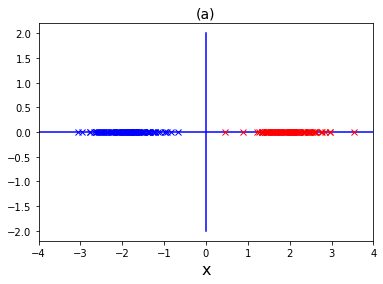

In [63]:
xx = np.linspace(0, 0, 10)
yy = np.linspace(-2, 2, 10)
plt.plot(xx,yy,'-b')
xx = np.linspace(-10, 10, 10)
yy = np.linspace(0, 0, 10)
plt.plot(xx,yy,'-b')

plt.xlim([-4, 4])
# plt.ylim([-0.1,0.1])

plt.plot(r1,zeros, 'bx')
plt.plot(r2,zeros, 'rx')

plt.xlabel('x', size=16)
plt.title('(a)',size=14)

plt.show()


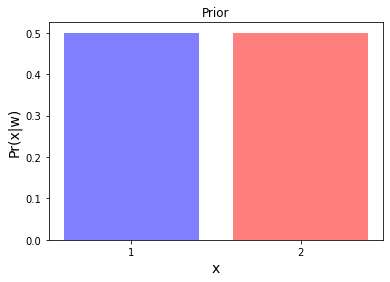

In [64]:
prior = [0.5, 0.5]
bins = [1, 2]
plt.bar(np.array(bins), np.array(prior), color=['b', 'r'], align='center', tick_label=[1,2], alpha=0.5)
plt.xlabel('x', size = 14)
plt.ylabel('Pr(x|w)', size = 14)
plt.title('Prior')

plt.show()

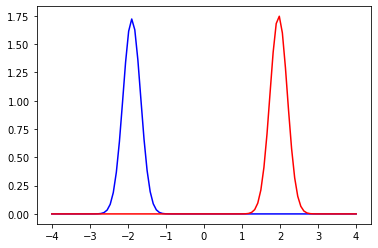

In [65]:
def mleNorm(x):
    I = x.size;
    mu = sum(x) / I;
    var = sum(pow(x - mu, 2)) / I;
    return mu, var

# Maximum of a posterior
def mapNorm(x, alpha, beta, gamma, delta):
    I = x.size;
    mu = (sum(x) + gamma*delta) / (I + gamma);
    var_up = sum(pow(x - mu,2)) + 2*beta + gamma*pow(delta-mu,2);
    var_down = I + 3 + 2*alpha;
    var = var_up / var_down;
    return mu, var

estimated_mu1, estimated_var1 = mleNorm(r1)
estimated_mu2, estimated_var2 = mleNorm(r2)
x = np.linspace(-4, 4, 100)
mle1 = stats.norm.pdf(x, estimated_mu1, estimated_var1)
mle2 = stats.norm.pdf(x, estimated_mu2, estimated_var2)
plt.plot(x, mle1, color = 'b')
plt.plot(x, mle2, color = 'r')
plt.show()